In [1]:
import matplotlib
from tensorcraft.tensor import Tensor
from tensorcraft.viz import plotProcessorView2D, plot2DMesh, plotTensor2D, plotTensor3D


matplotlib.rcParams["figure.dpi"] = 250

In [2]:
t = Tensor((3, 6))
t.info()
print(t.linearIndex((0, 4)))

Order: 2
Shape: [3 6]
Size: 18
[1 0]
4


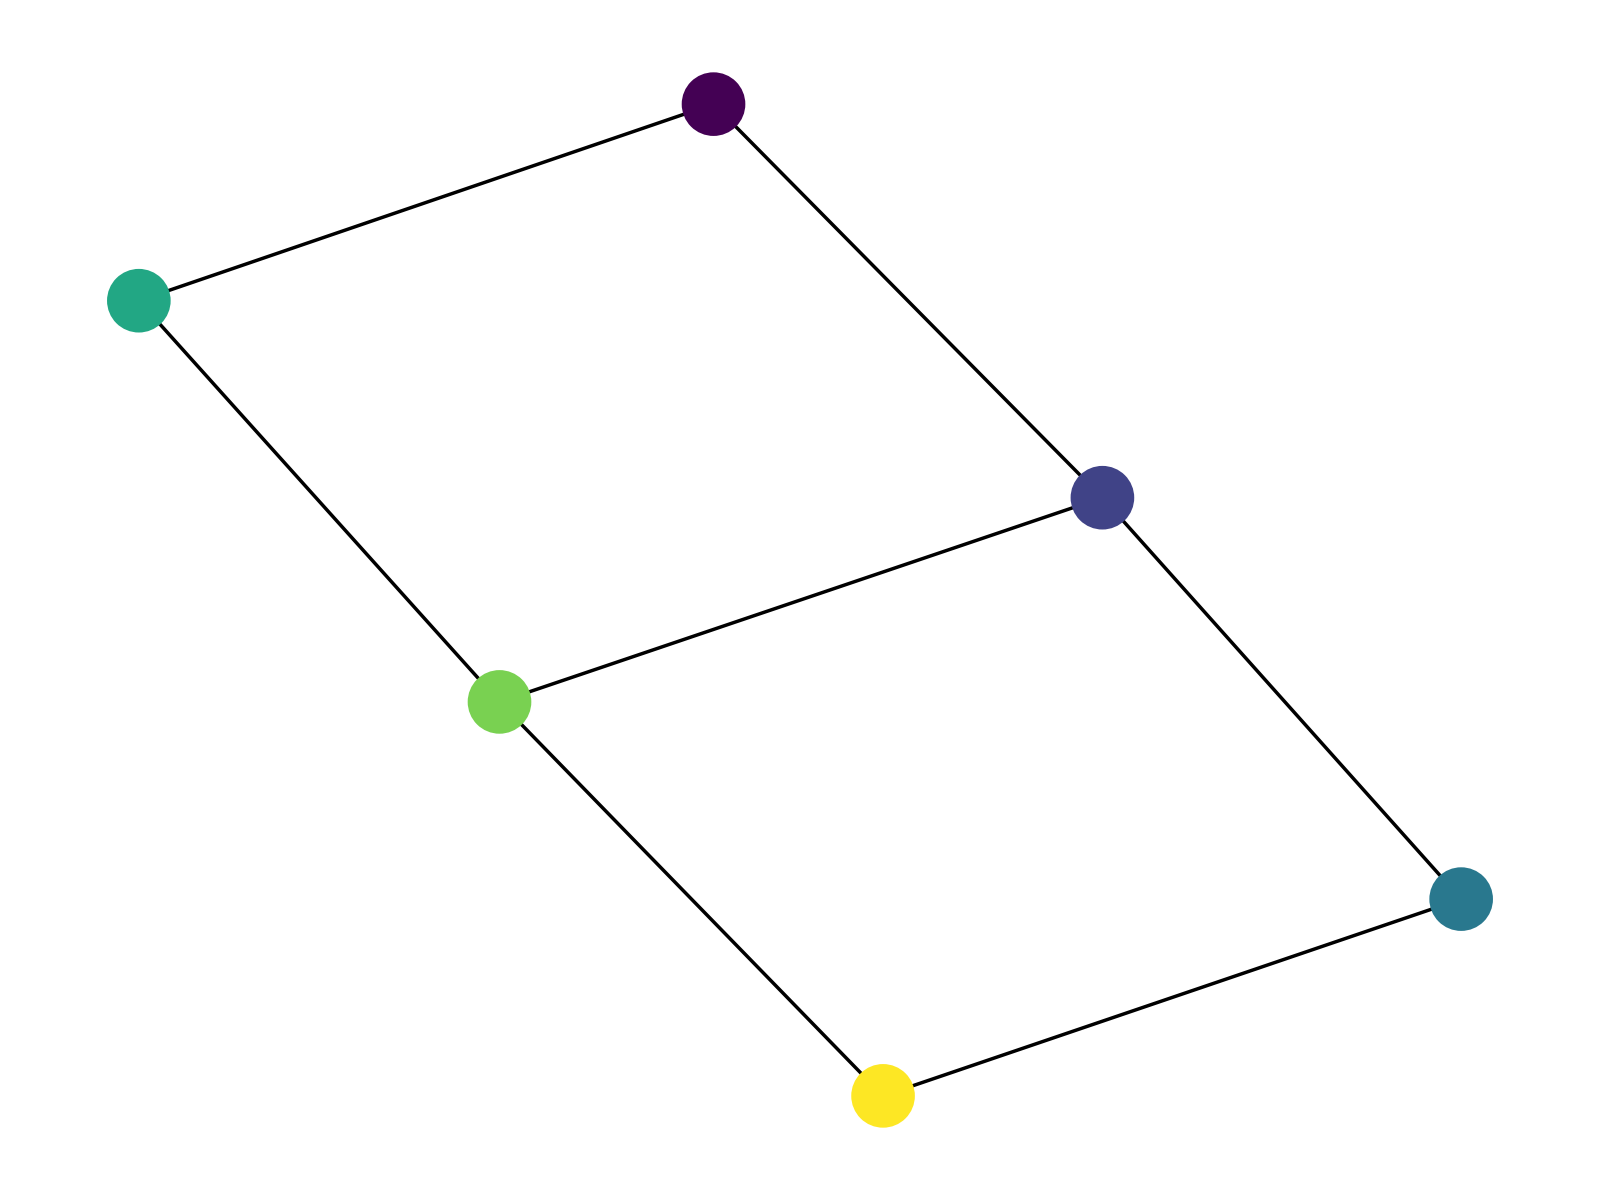

In [3]:
%matplotlib widget
mesh = Tensor((2, 3))
plot2DMesh(mesh)

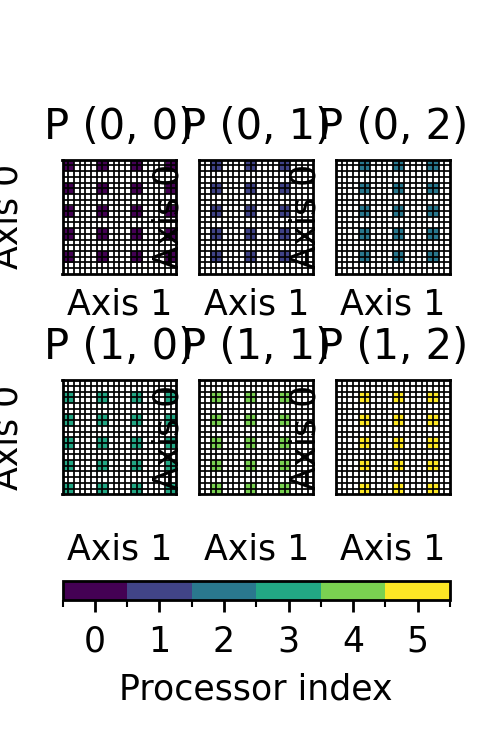

In [4]:
%matplotlib widget
from tensorcraft.distributions.pmesh import PMeshDist

tensor = Tensor((20, 20))
d = PMeshDist(mesh, ((0,), (1,)), (2, 2))
plotProcessorView2D(tensor, d)

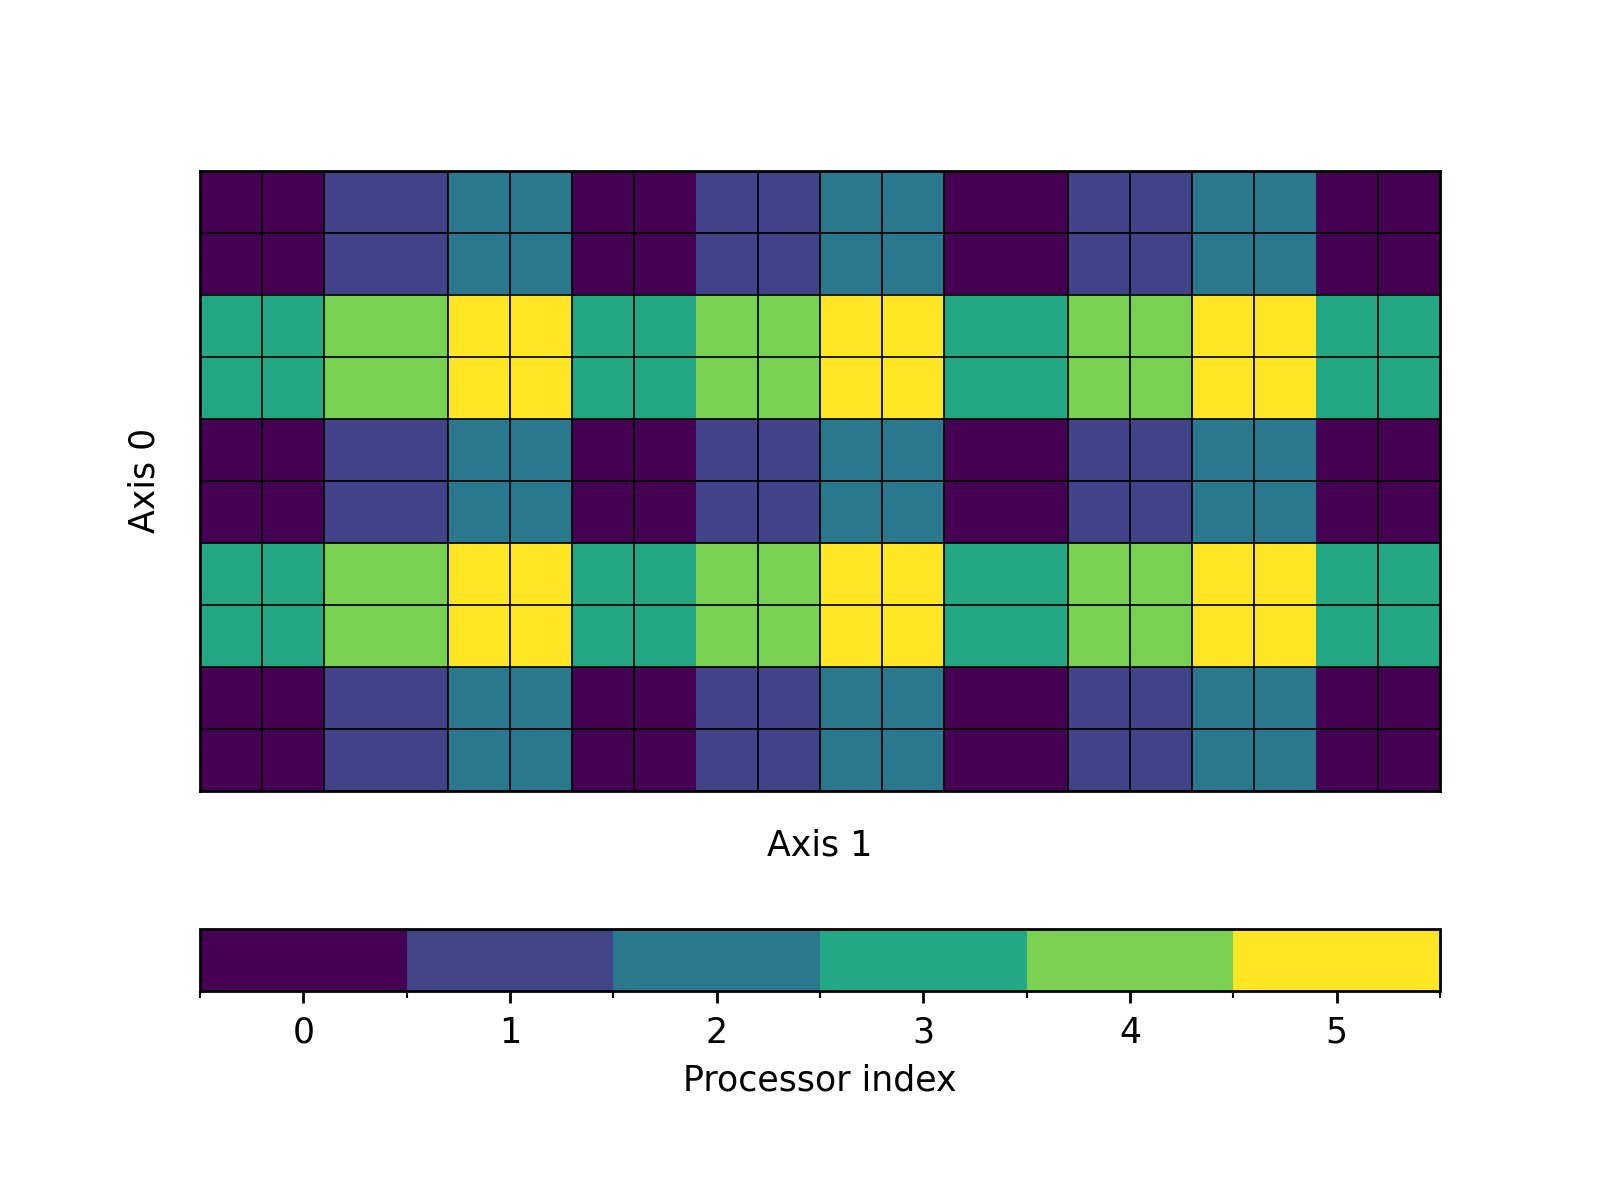

In [5]:
%matplotlib widget
tensor = Tensor((10, 20))
d = PMeshDist(mesh, ((0,), (1,)), (2, 2))
plotTensor2D(tensor, d)

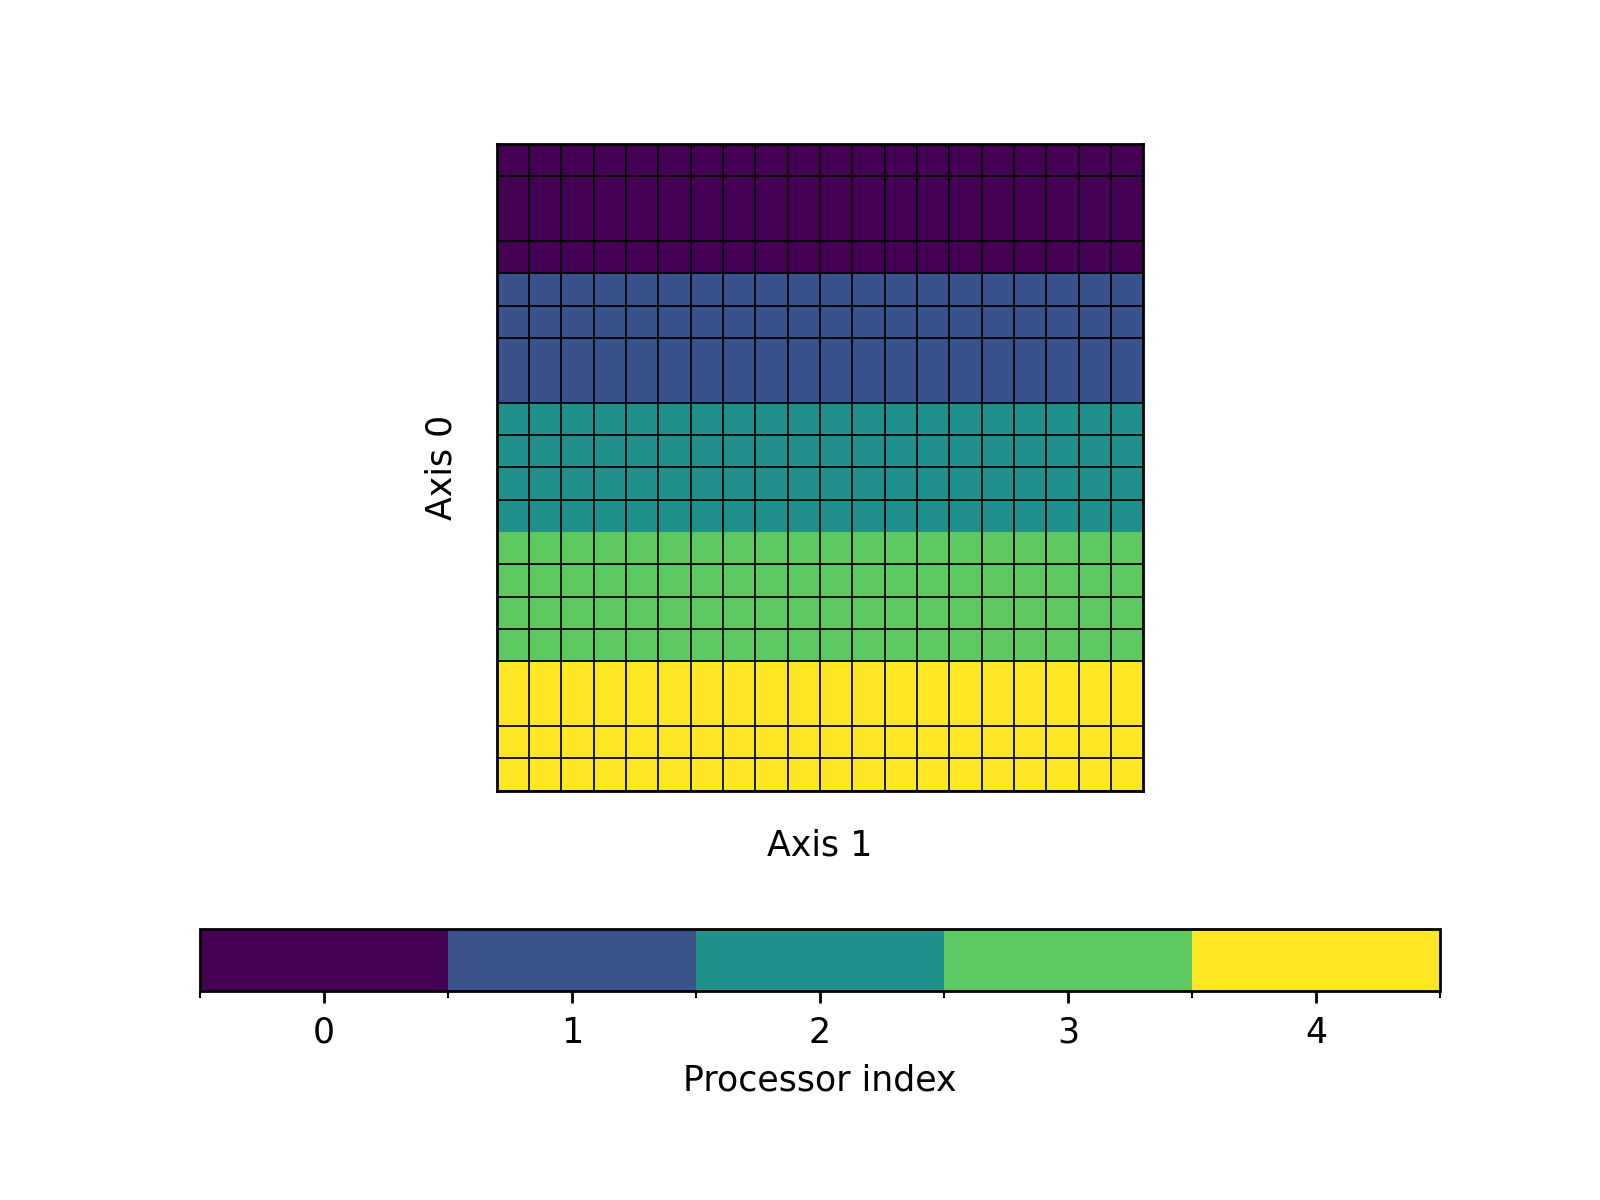

In [6]:
%matplotlib widget
from tensorcraft.distributions.block import BlockDist

tensor = Tensor((20, 20))
d = BlockDist(5, 0)
plotTensor2D(tensor, d)

In [7]:
%matplotlib widget

from tensorcraft.distributions.tile import TileDist

tensor = Tensor((50, 50))
d = TileDist(12, 5)
plotTensor2D(tensor, d)

SyntaxError: invalid syntax (tile.py, line 38)

In [ ]:
%matplotlib widget
tensor = Tensor((5, 5, 5))
dist = TileDist(8, 1)
# dist = BlockDist(5, 0)
plotTensor3D(tensor, dist)

: 